#  Unit 2.4b Function Programming
> Another type of programming that can be used in parallel with Object Oriented Programming.
- toc: true
- categories: [python, functions, abstraction]
- type: ap
- week: 26

In [3]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()

In [4]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#read()

In [5]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#create()

In [6]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()

In [7]:
def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

In [8]:
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")

In [ ]:
import datetime
from datetime import datetime
import json
from sqlalchemy.exc import IntegrityError
from werkzeug.security import generate_password_hash, check_password_hash
"""
These imports define the key objects
"""

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

"""
These object and definitions are used throughout the Jupyter Notebook.
"""

# Setup of key Flask object (app)
app = Flask(__name__)
# Setup SQLAlchemy object and properties for the database (db)
database = 'sqlite:///files/sqlite.db'  # path and filename of database
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
app.config['SQLALCHEMY_DATABASE_URI'] = database
app.config['SECRET_KEY'] = 'SECRET_KEY'
db = SQLAlchemy()


# This belongs in place where it runs once per project
db.init_app(app)


class User(db.Model):
    __tablename__ = 'users'  # table name is plural, class name is singular

    # Define the User schema with "vars" from object
    id = db.Column(db.Integer, primary_key=True)
    _name = db.Column(db.String(255), unique=False, nullable=False)
    _uid = db.Column(db.String(255), unique=True, nullable=False)
    _password = db.Column(db.String(255), unique=False, nullable=False)
    _dob = db.Column(db.Date)
    _favnum = db.Column(db.Integer, unique=False, nullable=False)

    # constructor of a User object, initializes the instance variables within object (self)
    def __init__(self, name, uid, password="123qwerty", dob=datetime.today(), favnum):
        self._name = name    # variables with self prefix become part of the object, 
        self._uid = uid
        self.set_password(password)
        if isinstance(dob, str):  # not a date type     
            dob = date=datetime.today()
        self._dob = dob
        self._favnum = favnum

    # a favnum getter method, extracts favnum from object
    @property
    def favnum(self):
        return self._favnum
    
    # a setter function, allows favnum to be updated after initial object creation
    @name.setter
    def name(self, favnum):
        self._favnum = favnum

    # a name getter method, extracts name from object
    @property
    def name(self):
        return self._name
    
    # a setter function, allows name to be updated after initial object creation
    @name.setter
    def name(self, name):
        self._name = name
    
    # a getter method, extracts uid from object
    @property
    def uid(self):
        return self._uid
    
    # a setter function, allows uid to be updated after initial object creation
    @uid.setter
    def uid(self, uid):
        self._uid = uid
        
    # check if uid parameter matches user id in object, return boolean
    def is_uid(self, uid):
        return self._uid == uid
    
    @property
    def password(self):
        return self._password[0:10] + "..." # because of security only show 1st characters

    # update password, this is conventional method used for setter
    def set_password(self, password):
        """Create a hashed password."""
        self._password = generate_password_hash(password, method='sha256')

    # check password parameter against stored/encrypted password
    def is_password(self, password):
        """Check against hashed password."""
        result = check_password_hash(self._password, password)
        return result
    
    # dob property is returned as string, a string represents date outside object
    @property
    def dob(self):
        dob_string = self._dob.strftime('%m-%d-%Y')
        return dob_string
    
    # dob setter, verifies date type before it is set or default to today
    @dob.setter
    def dob(self, dob):
        if isinstance(dob, str):  # not a date type     
            dob = date=datetime.today()
        self._dob = dob
    
    # age is calculated field, age is returned according to date of birth
    @property
    def age(self):
        today = datetime.today()
        return today.year - self._dob.year - ((today.month, today.day) < (self._dob.month, self._dob.day))
    
    # output content using str(object) is in human readable form
    # output content using json dumps, this is ready for API response
    def __str__(self):
        return json.dumps(self.read())

    # CRUD create/add a new record to the table
    # returns self or None on error
    def create(self):
        try:
            # creates a person object from User(db.Model) class, passes initializers
            db.session.add(self)  # add prepares to persist person object to Users table
            db.session.commit()  # SqlAlchemy "unit of work pattern" requires a manual commit
            return self
        except IntegrityError:
            db.session.remove()
            return None

    # CRUD read converts self to dictionary
    # returns dictionary
    def read(self):
        return {
            "id": self.id,
            "name": self.name,
            "uid": self.uid,
            "dob": self.dob,
            "age": self.age,
            "favorite number": self.favnum
        }

    # CRUD update: updates user name, password, phone
    # returns self
    def update(self, name="", uid="", password="", favnum=""):
        """only updates values with length"""
        if len(name) > 0:
            self.name = name
        if len(uid) > 0:
            self.uid = uid
        if len(password) > 0:
            self.set_password(password)
        if favnum > 0 and favnum < 999999999999999:
            self.favnum = favnum
        db.session.commit()
        return self

    # CRUD delete: remove self
    # None
    def delete(self):
        db.session.delete(self)
        db.session.commit()
        return None
    

# Procedural Abstraction

Procedural abstraction is the process of breaking down a complex task or problem into smaller, more manageable sub-tasks or procedures. This allows programmers to focus on writing code for individual procedures, rather than dealing with the complexity of the overall task. Procedural abstraction is achieved through the use of functions, which are reusable blocks of code that perform a specific task. By encapsulating functionality in functions, programmers can write code that is easier to understand, debug, and maintain.


# Data Abstraction
Data abstraction, on the other hand, is the process of hiding the implementation details of data structures and operations, while exposing only the essential features of the data and the operations that can be performed on it. This is achieved through the use of abstract data types (ADTs), which are user-defined data types that provide a set of operations for manipulating the data. The implementation details of the data structure are hidden behind the ADT interface, which makes it easier to reason about the data and write code that is more modular and reusable.

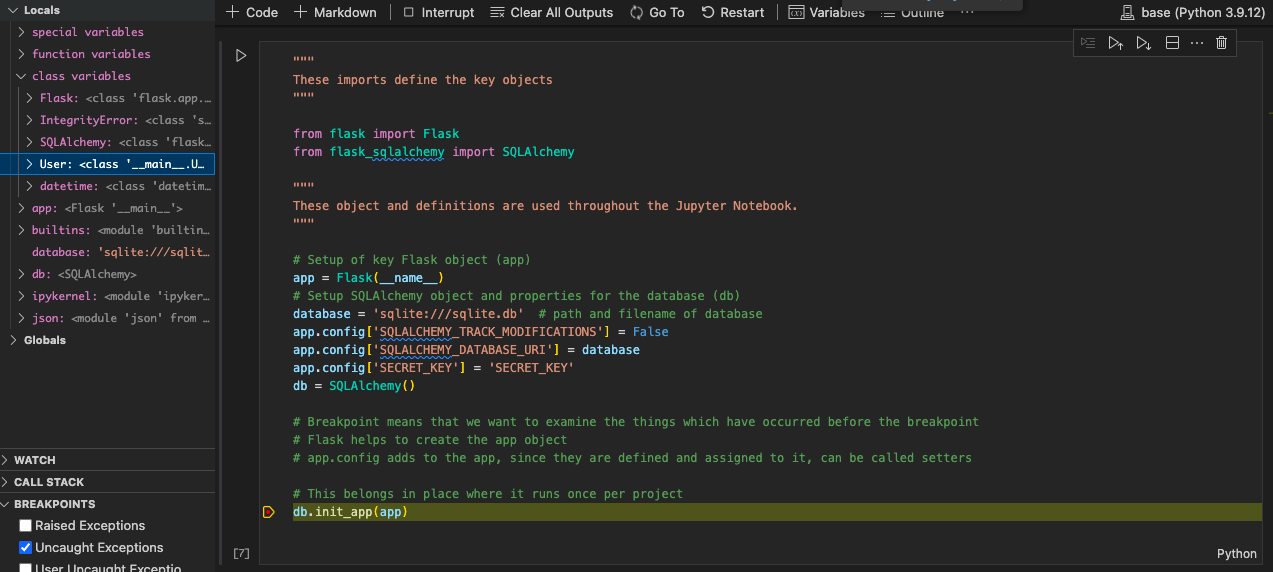